In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [12]:
import atik


# Get the camera
camera = atik.getCamera(0)
print 'Found {}'.format(camera.getName())

Found Atik Titan


In [13]:

# Open the camera
camera.open()

# List capabilities
result = camera.getCapabilities()
success, capabilities = result[0], result[1:]
print list(enumerate(capabilities))

[(0, 'Atik Titan'), (1, 3), (2, False), (3, True), (4, False), (5, False), (6, 0), (7, 658), (8, 492), (9, 7.4), (10, 7.4), (11, 8), (12, 8), (13, 0), (14, 0)]


In [14]:
# Find width and height for a particular binning
pixel_x = capabilities[7]
pixel_y = capabilities[8]

width  = camera.imageWidth(pixel_x, 1)
height = camera.imageHeight(pixel_y, 1)
print 'Width = {}, Height = {}'.format(width, height)

Width = 658, Height = 492


In [15]:
# A computer-timed exposure
camera.startExposure(False)
time.sleep(5)
camera.readCCD(0, 0, pixel_x, pixel_y, 1, 1)
success, data = camera.getImage(width*height)

print 'Success = {}'.format(success)

Success = True


In [16]:
# Reshape the data (numpy array)
data.shape=(height, width)

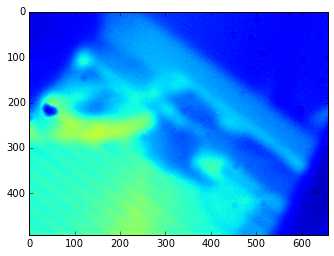

In [17]:
# Plot the data
figure = plt.figure(1)
axes = figure.add_subplot(1, 1, 1)
axes.imshow(np.log(data))

In [18]:
# Close the camera
camera.close()